## Exploratory Data Analysis - Customer Loans in Finance

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

### Load Data

In [4]:
# Load raw data from csv file into DataFrame and display same.
df_raw = pd.read_csv('loan_payments.csv')
df_raw.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,Jan-2021,Current,n,credit_card,19.54,2,Oct-1987,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,Jan-2021,Current,n,credit_card,24.20,0,Sep-2001,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,Jan-2021,Fully Paid,n,credit_card,16.92,0,Sep-1998,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,Jan-2021,Fully Paid,n,debt_consolidation,35.52,0,Jun-2008,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,Jan-2021,Current,n,debt_consolidation,3.33,0,Apr-2002,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


In [5]:
# Show DataFrame information to determine which columns will require conversion to correct data type.
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

### Conversion of columns to correct format.

- to_object_columns = ['id', 'member_id', 'policy_code']
- to_float_columns = ['loan_amount'] 
- to_category_columns = ['term', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status', 'payment_plan', 'purpose', 'application_type']
- to_integer_columns = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'collections_12_mths_ex_med']
- to_datetime_columns = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']         

In [7]:
# Import the DataTransform class for dataype transformation.
from dtype_transform import DataTransform

In [8]:
# Create an instance of the DataTransform class
tf = DataTransform(df_raw)

In [10]:
# Convert the columns of the DataFrame to correct format using the relevant methods of my 'DataTransform' class 
to_object_columns = ['id', 'member_id', 'policy_code']
to_float_columns = ['loan_amount'] 
to_category_columns = ['term', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status', 'payment_plan', 'purpose', 'application_type']
to_integer_columns = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'collections_12_mths_ex_med']
to_datetime_columns = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']

tf.to_object(to_object_columns)
tf.to_float(to_float_columns)
tf.to_category(to_category_columns)
tf.to_integer(to_integer_columns)
new_df = tf.to_datetime(to_datetime_columns)

### Get information from the converted DataFrame.

In [12]:
# Import the DataFrameInfo class for obtaining DataFrame information.
from dataframe_info import DataFrameInfo

In [13]:
# Create an instance of the DataFrameInfo class
columns_info = DataFrameInfo(new_df)

In [14]:
# Describe all columns in the DataFrame to check their data types
columns_info.describe_columns()

id                                     object
member_id                              object
loan_amount                           float64
funded_amount                         float64
funded_amount_inv                     float64
term                                 category
int_rate                              float64
instalment                            float64
grade                                category
sub_grade                            category
employment_length                    category
home_ownership                       category
annual_inc                            float64
verification_status                  category
issue_date                     datetime64[ns]
loan_status                          category
payment_plan                         category
purpose                              category
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           datetime64[ns]
inq_last_6mths                    

In [15]:
# Extract statistical values: median, standard deviation and mean from the columns and the DataFrame
columns_info.extract_stats()

,column,median,std,mean
0,loan_amount,12000.00,8082.196709,13333.076100
1,funded_amount,12000.00,8019.017599,13229.509117
2,funded_amount_inv,11300.00,8099.473527,12952.622979
3,int_rate,13.16,4.392893,13.507328
4,instalment,347.15,238.920012,400.013953
5,annual_inc,61000.00,51589.339577,72220.848249
6,dti,15.60,7.623124,15.867087
7,delinq_2yrs,0.00,0.706706,0.241799
8,inq_last_6mths,1.00,1.261421,0.893843
9,mths_since_last_delinq,31.00,21.923240,34.019200


In [16]:
# Count distinct values in categorical columns
columns_info.count_distinct_categories()

term                    2
grade                   7
sub_grade              35
employment_length      11
home_ownership          5
verification_status     3
loan_status             9
payment_plan            2
purpose                14
application_type        1
dtype: int64

In [17]:
# Print out the shape of the DataFrame
columns_info.print_dataframe_shape()

Shape of DataFrame: [54231 rows x 43 columns]



In [19]:
# Determine the amount of NULLs in each column
columns_info.generate_null_counts()

,column,count,% null count
0,id,54231,0.000000
1,member_id,54231,0.000000
2,loan_amount,54231,0.000000
3,funded_amount,51224,5.544799
4,funded_amount_inv,54231,0.000000
5,term,49459,8.799395
6,int_rate,49062,9.531449
7,instalment,54231,0.000000
8,grade,54231,0.000000
9,sub_grade,54231,0.000000


### Remove/impute missing values in data

In [20]:
# Import the DataFrameTransform class for DataFrame transformation operations.
from data_transform import DataFrameTransform

In [21]:
# Create an instance of the DataFrameTransform class
transform = DataFrameTransform(new_df)

In [22]:
# Get new DataFrame after dropping all Columns with more than 50% NULL count and NULL rows of datetime columns.
df_cols_dropped = transform.drop_null_columns()

In [23]:
# Display the head of the new DataFrame
df_cols_dropped.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000.0,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0,1,INDIVIDUAL
1,38656203,41440010,13200.0,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0,1,INDIVIDUAL
2,38656154,41439961,16000.0,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0,1,INDIVIDUAL
3,38656128,41439934,15000.0,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0,1,INDIVIDUAL
4,38656121,41439927,15000.0,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0,1,INDIVIDUAL


In [24]:
# Display the shape of the DataFrame. This result shows that 4 columns have been dropped.

df_cols_dropped.shape

(54151, 39)

In [25]:
# Confirm that columns with more than 50% NULL vales have been dropped
columns_info = DataFrameInfo(df_cols_dropped)
columns_info.generate_null_counts()

,column,count,% null count
0,id,54151,0.000000
1,member_id,54151,0.000000
2,loan_amount,54151,0.000000
3,funded_amount,51151,5.540064
4,funded_amount_inv,54151,0.000000
5,term,49385,8.801315
6,int_rate,48990,9.530757
7,instalment,54151,0.000000
8,grade,54151,0.000000
9,sub_grade,54151,0.000000


In [26]:
# Impute missing values
df_imputed = transform.impute_null_values()

In [27]:
# Display the DataFrame after imputaing null values
df_imputed.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000.0,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0,1,INDIVIDUAL
1,38656203,41440010,13200.0,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0,1,INDIVIDUAL
2,38656154,41439961,16000.0,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0,1,INDIVIDUAL
3,38656128,41439934,15000.0,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0,1,INDIVIDUAL
4,38656121,41439927,15000.0,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0,1,INDIVIDUAL


In [28]:
# Confirm that all NULLs have been removed
columns_info = DataFrameInfo(df_imputed)
columns_info.generate_null_counts()

,column,count,% null count
0,id,54151,0.0
1,member_id,54151,0.0
2,loan_amount,54151,0.0
3,funded_amount,54151,0.0
4,funded_amount_inv,54151,0.0
5,term,54151,0.0
6,int_rate,54151,0.0
7,instalment,54151,0.0
8,grade,54151,0.0
9,sub_grade,54151,0.0


<Axes: >

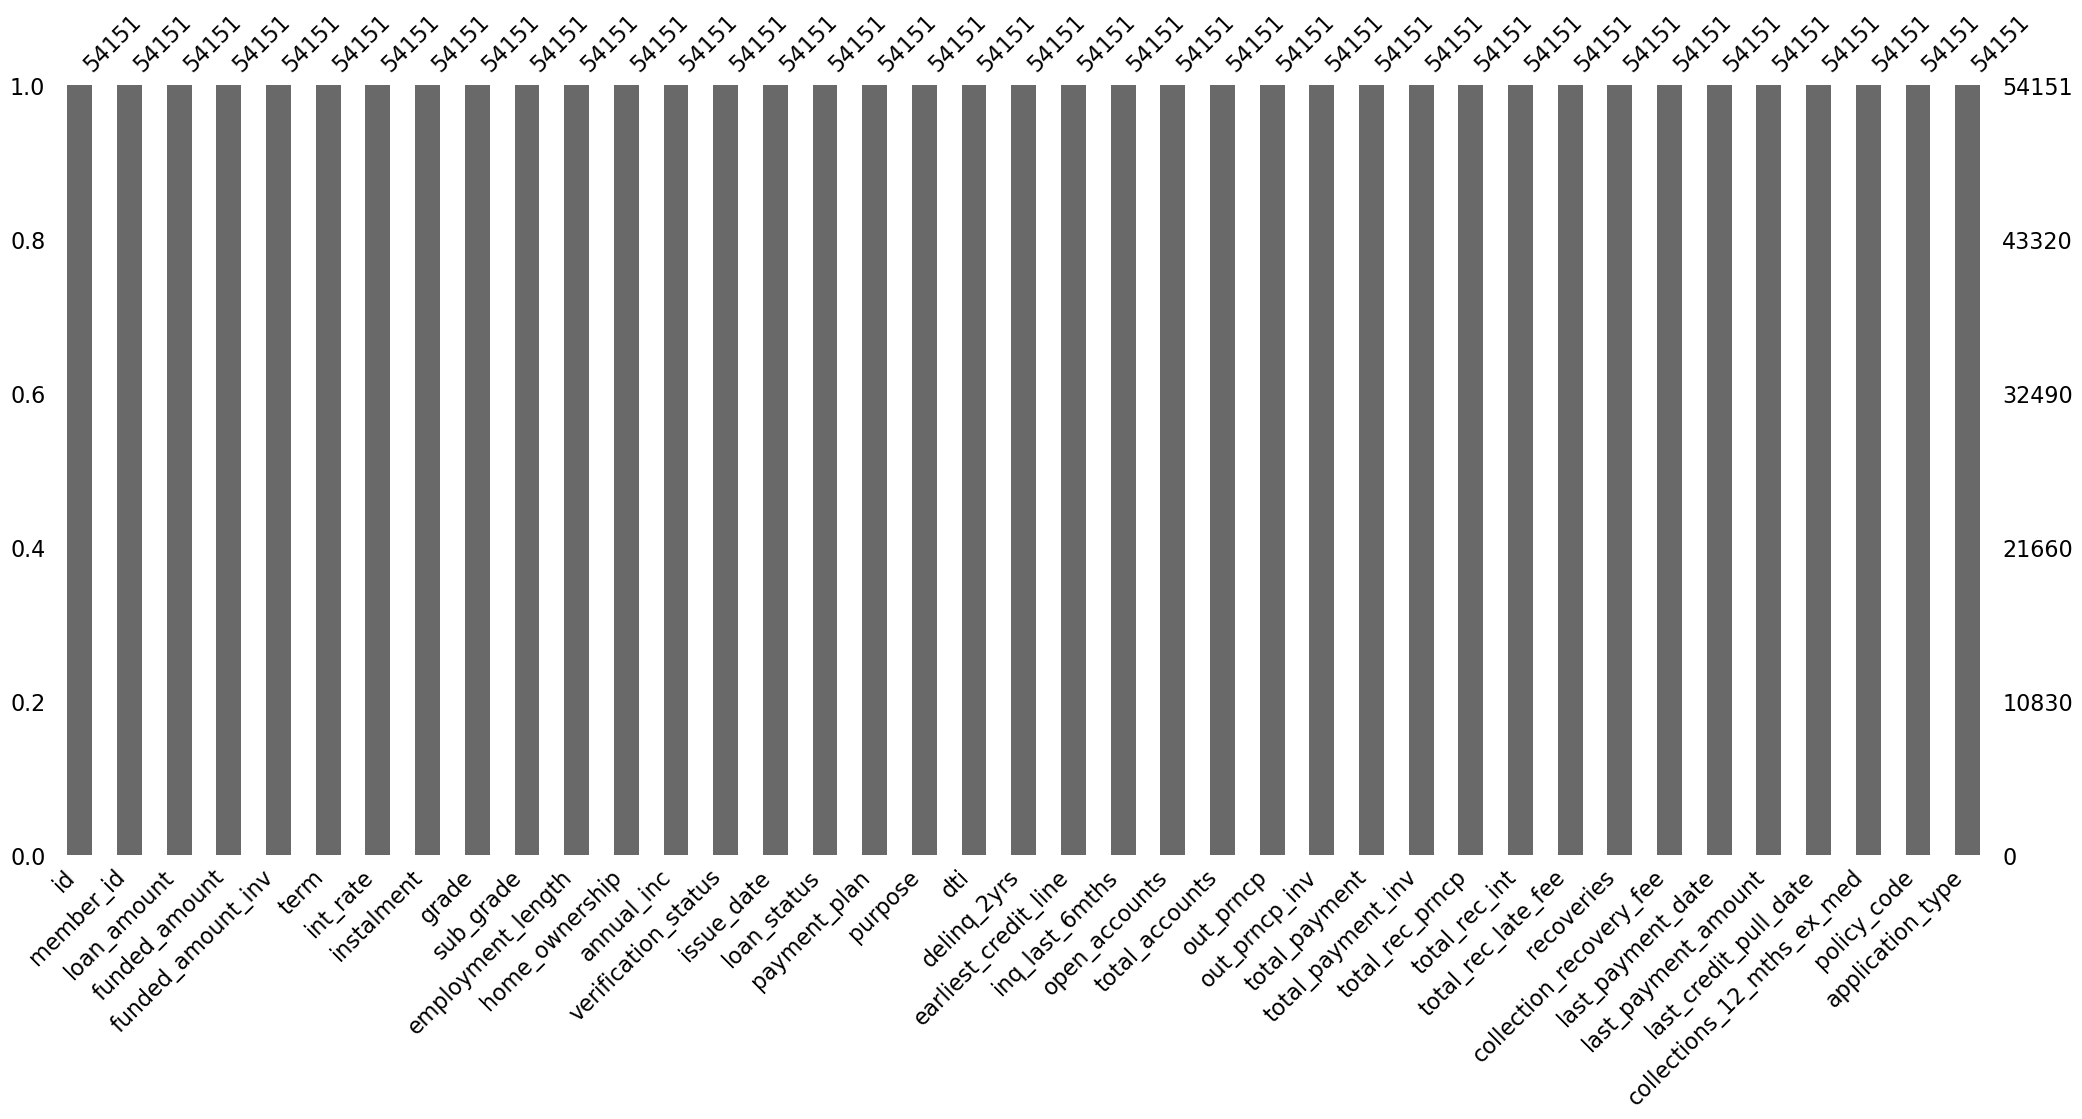

In [29]:
# Generate a plot to visualise the removal of NULL values.
# Import Plotter class
from data_plotter import Plotter
plotter = Plotter(df_imputed)
plotter.visualise_nulls_impute()

### Perform transformations on skewed data

In [30]:
# Check skewness for all dataset columns
df_imputed.skew(numeric_only=True)

id                             2.370227
member_id                      2.205248
loan_amount                    0.804922
funded_amount                  0.869634
funded_amount_inv              0.813376
int_rate                        0.45662
instalment                     0.996572
annual_inc                       8.7175
dti                            0.189101
delinq_2yrs                    5.376385
inq_last_6mths                 3.253523
open_accounts                  1.059184
total_accounts                  0.77904
out_prncp                      2.354051
out_prncp_inv                  2.354471
total_payment                  1.269875
total_payment_inv               1.25787
total_rec_prncp                1.262679
total_rec_int                  2.204585
total_rec_late_fee            13.174553
recoveries                    14.389299
collection_recovery_fee       27.807754
last_payment_amount             2.49722
collections_12_mths_ex_med    20.307695
policy_code                         0.0


All the columns are positively skewed with skew values > 0. Using a threshold of 0.5, the 'dti' and int_rate columns have skew values below 0.5 and so can be considered to be fairly symmetrical.

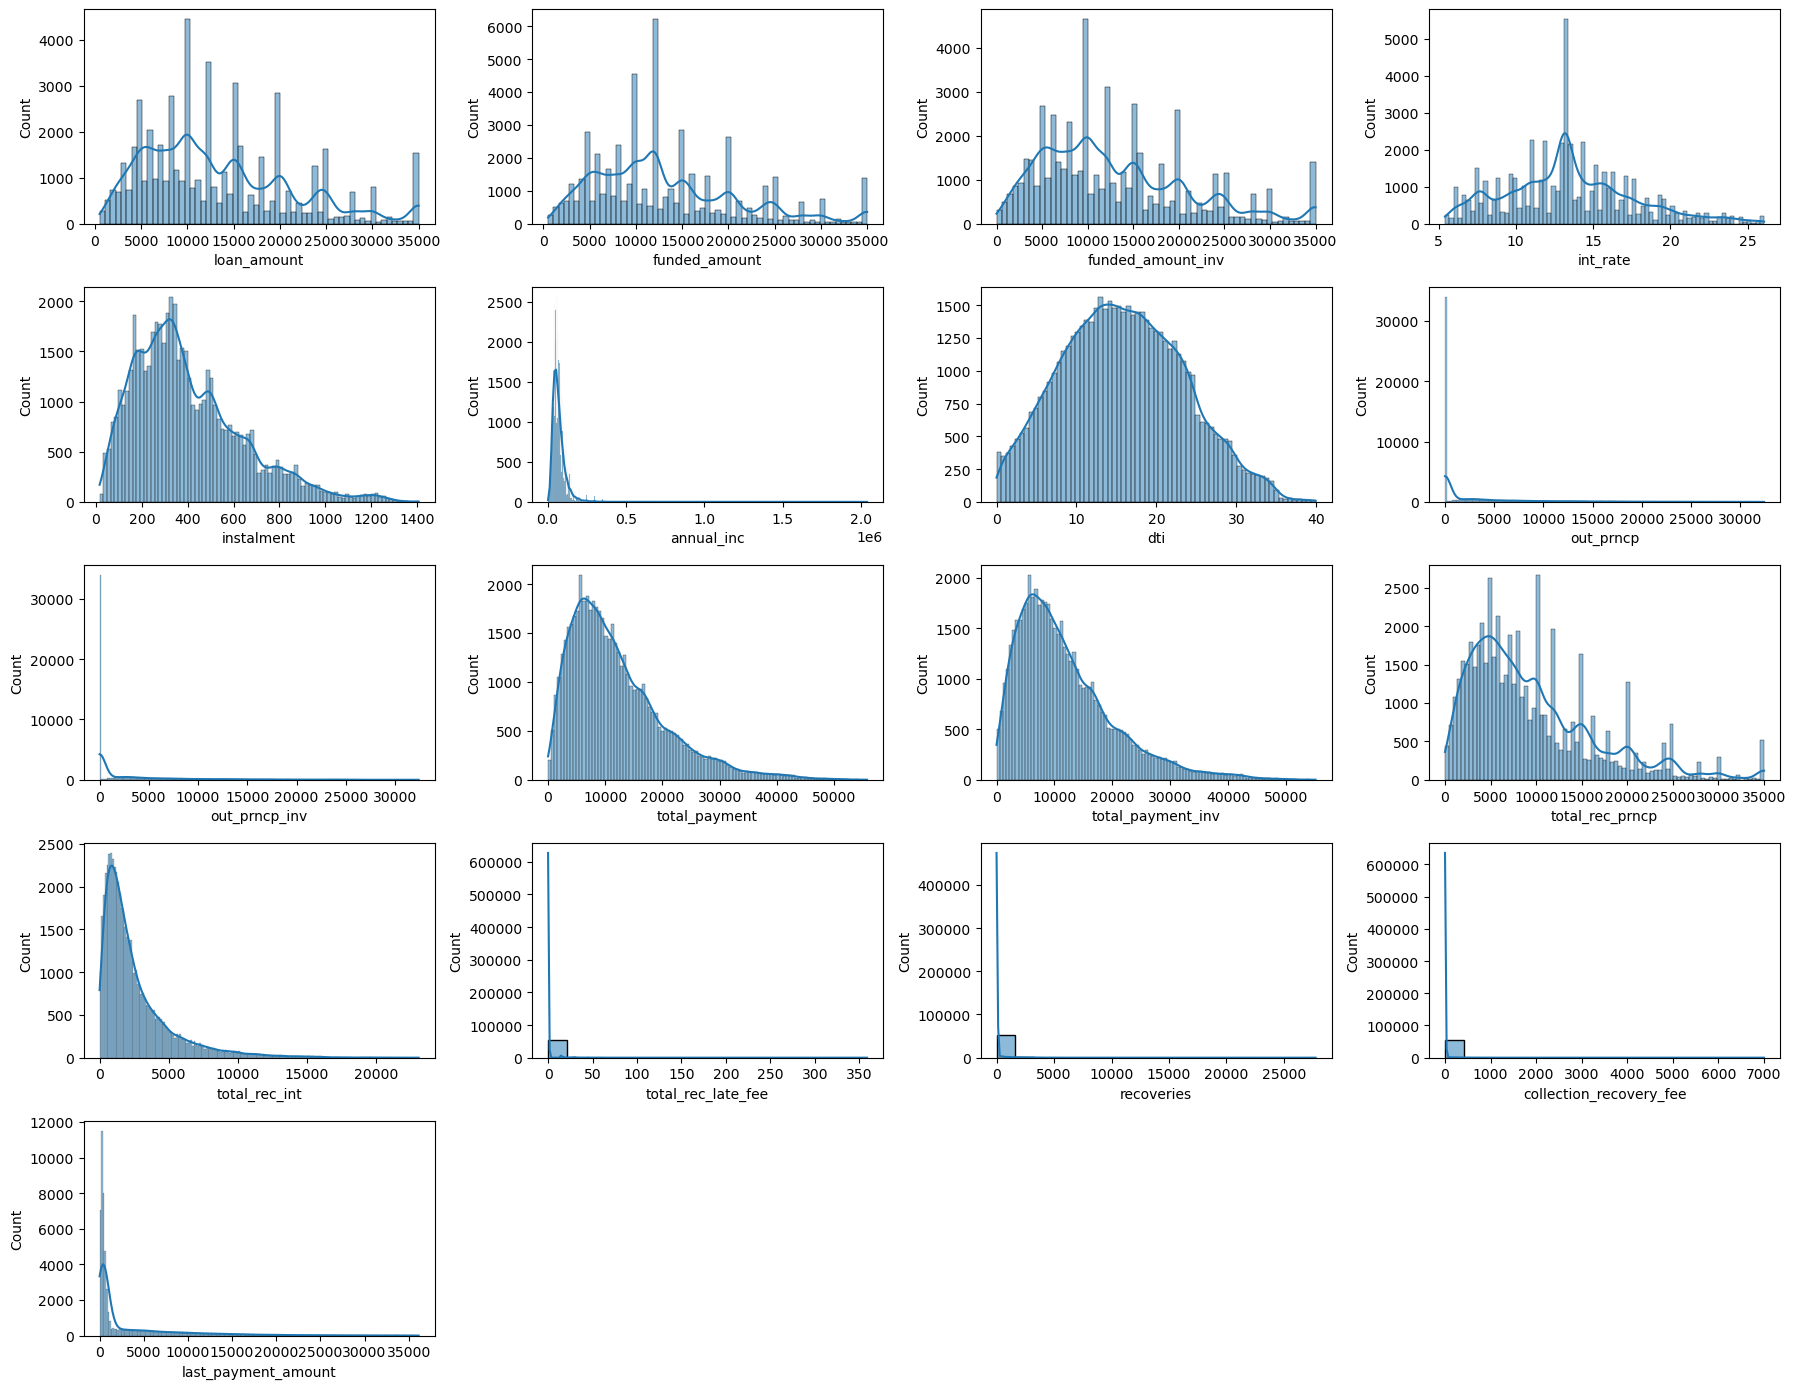

In [31]:
#  Visualise the data using my Plotter class to analyse the skew.
plotter.visualise_skewness()

In [32]:
# Save a separate copy of the DataFrame
df_copy = df_imputed.copy()

Log and Yeo-johnson transformations will be performed on the 'total_payment_inv' column to determine which transformation results in the biggest reduction in skew.

In [33]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# Log Transformation
logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), ['total_payment_inv'])])
df_log = pd.DataFrame(logTr.fit_transform(df_imputed))
print(f"Skewness was {round(df_imputed['total_payment_inv'].skew(),2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")

Skewness was 1.26 before & is -2.75 after Log transformation.


In [34]:
from sklearn.preprocessing import PowerTransformer
# Yeo-johnson Transformation
yeojonTr = PowerTransformer(method = 'yeo-johnson', standardize=True)
df_yeojon = pd.DataFrame(yeojonTr.fit_transform(df_imputed[['total_payment_inv']]))
print(f"Skewness was {round(df_imputed['total_payment_inv'].skew(),2)} before & is {round(df_yeojon.skew()[0],2)} after Yeo-johnson transformation.")

Skewness was 1.26 before & is 0.01 after Yeo-johnson transformation.


In [36]:
# Apply the Yeo-johnson transformation to the data since it produced the biggest reduction in skewness of out test column.

df_yeojon = transform.transform_columns()

In [38]:
# The results of the transformation has improved the skewness of the data.
df_yeojon.skew(numeric_only=True)

loan_amount               -0.043069
funded_amount             -0.030109
funded_amount_inv         -0.036086
int_rate                  -0.011062
instalment                -0.020656
annual_inc                -0.012084
dti                       -0.087482
out_prncp                  0.530611
out_prncp_inv              0.530629
total_payment             -0.013836
total_payment_inv          0.005208
total_rec_prncp           -0.017648
total_rec_int              0.001293
total_rec_late_fee         5.274701
recoveries                 3.474915
collection_recovery_fee    3.618299
last_payment_amount        0.001347
dtype: float64

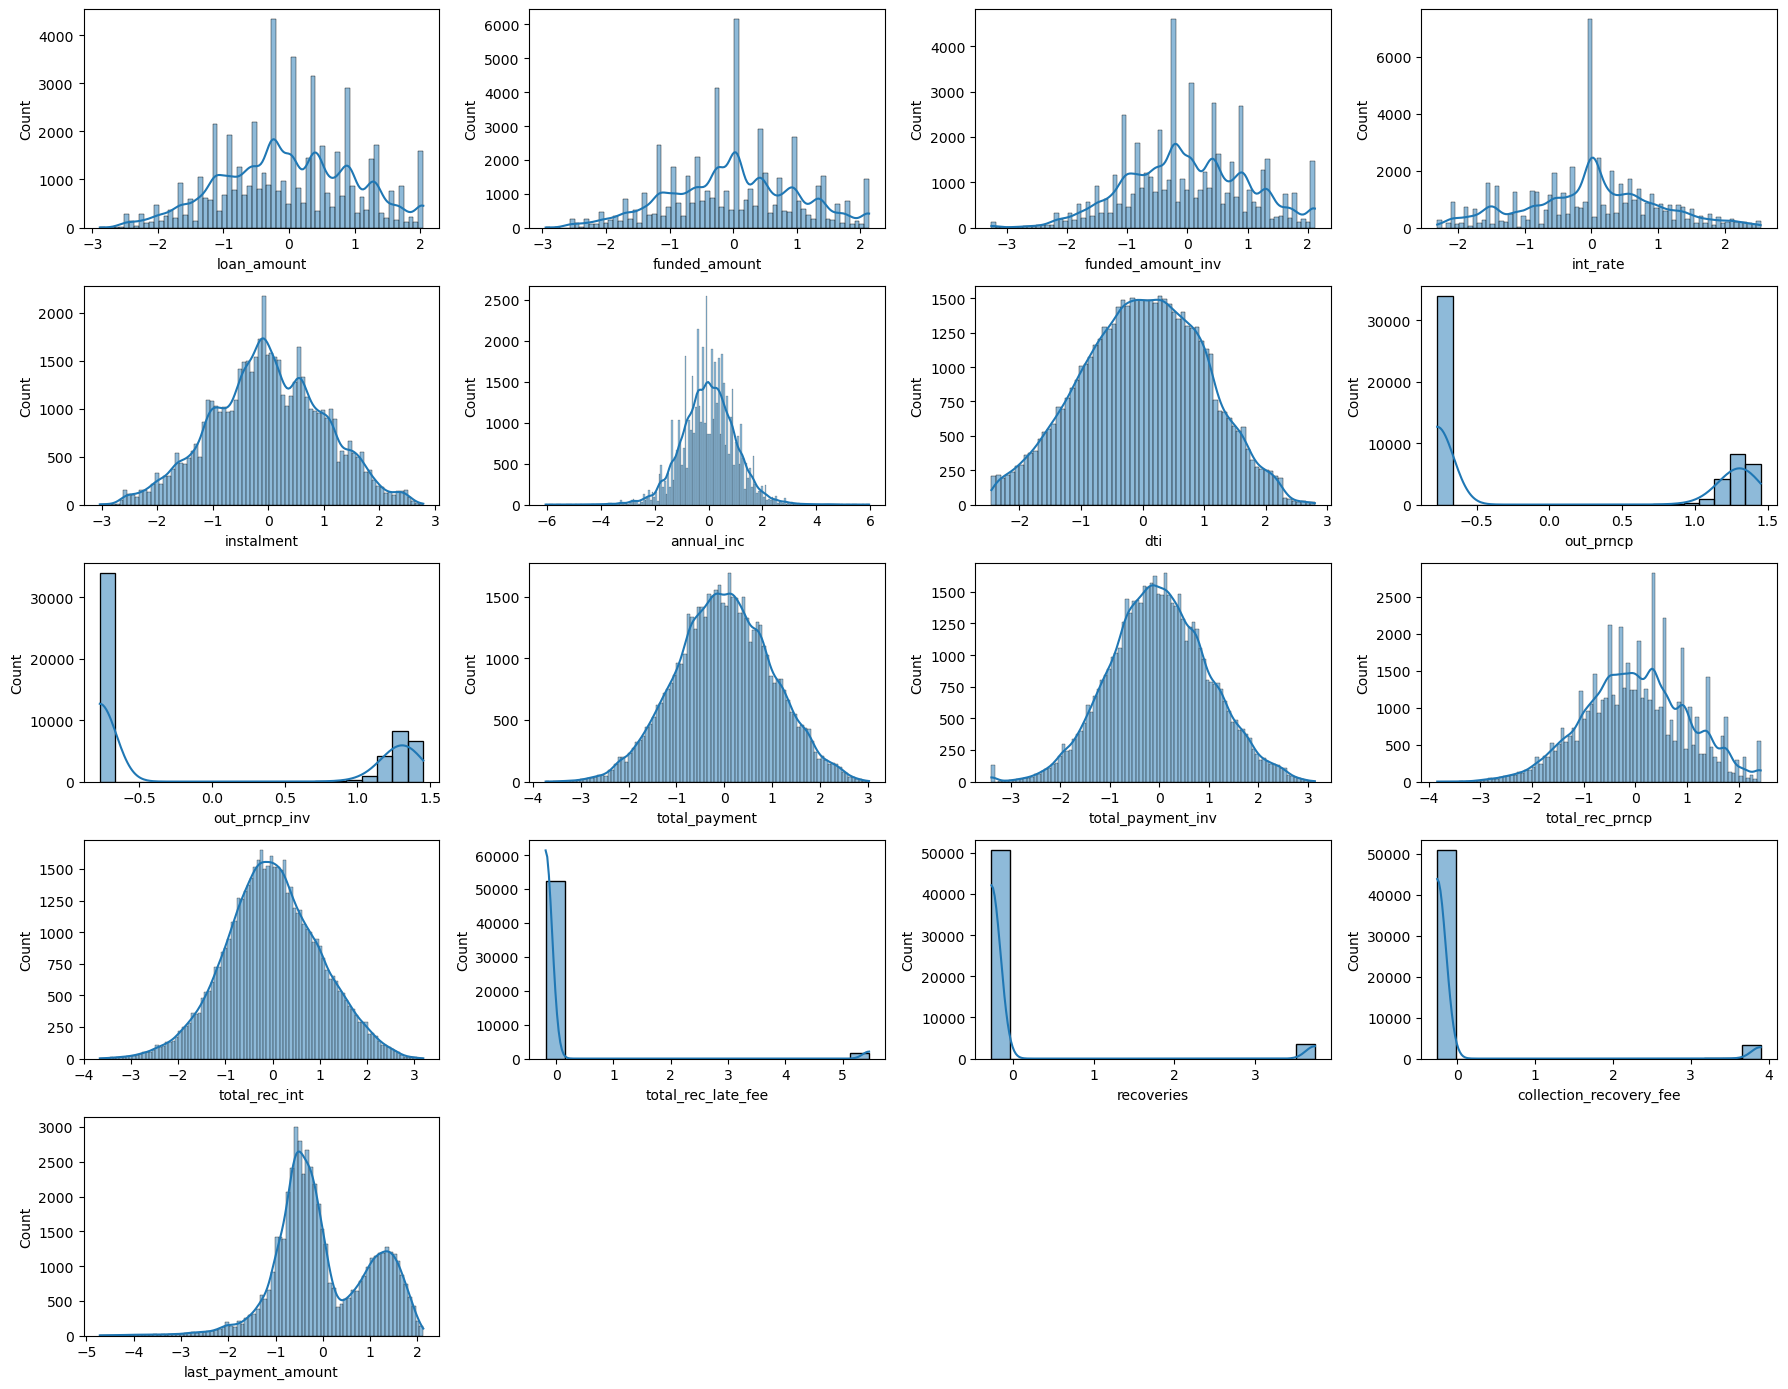

In [39]:
# Visualise the dats to ckeck if the results of the transformation has improved the skewness of the data.
plotter = Plotter(df_yeojon)
plotter.visualise_skewness()

### Remove outliers from the data

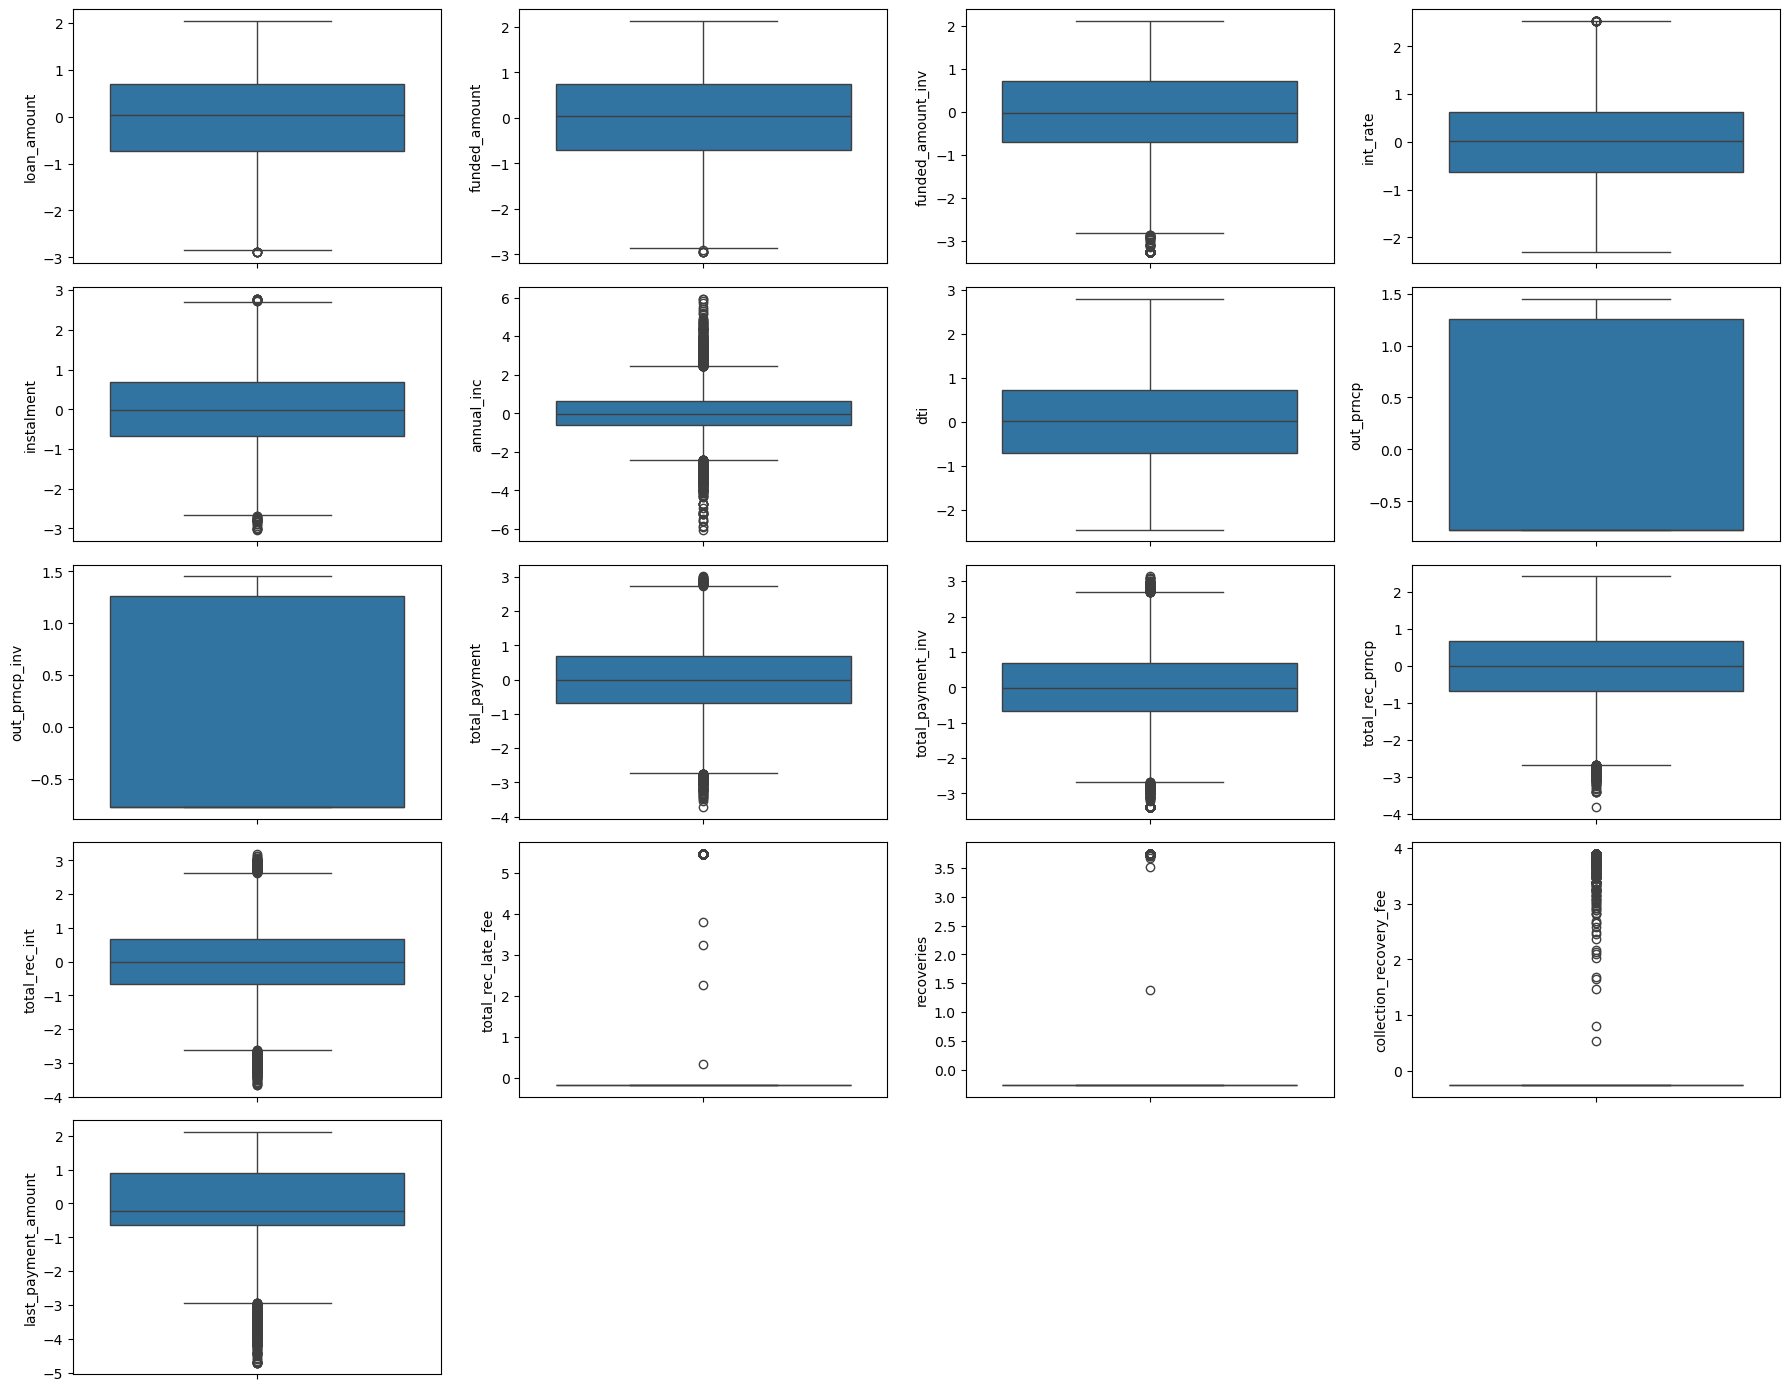

In [40]:
# Visualise outliers using Box plot
plotter.visualise_outliers()

In [41]:
# Create a new instance of the DataFrameTransform class
data = DataFrameTransform(df_yeojon)

In [42]:
# The outliers will be transformed using the capping method instead of removing them due to the preponderance of outliers in most of the columns
df_treated = data.treat_outliers()
df_treated.head()

,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount
0,-0.553338,-0.563335,-0.492729,-1.559993,-0.527587,-0.560027,0.504083,1.300177,1.300216,-1.397385,-1.281353,-1.210727,-1.133013,-0.183339,-0.267259,-0.258466,-0.729729
1,0.175907,0.191371,0.208012,-1.724305,0.227185,-0.400658,1.080657,1.317939,1.317975,-0.896483,-0.824873,-0.726217,-0.764457,-0.183339,-0.267259,-0.258466,-0.406720
2,0.495851,0.522325,0.522522,-1.559993,0.571878,0.337560,0.172000,-0.773136,-0.773136,0.740254,0.756103,1.027096,-0.724122,-0.183339,-0.267259,-0.258466,1.536518
3,0.385859,0.408554,0.413934,0.277857,0.633285,-0.734698,2.418493,-0.773136,-0.773136,0.656020,0.672003,0.926276,-0.598866,-0.183339,-0.267259,-0.258466,1.575609
4,0.385859,0.408554,0.413934,-2.057568,0.420225,1.575511,-1.734638,1.322022,1.322058,-0.770142,-0.707353,-0.580586,-0.783742,-0.183339,-0.267259,-0.258466,-0.334018


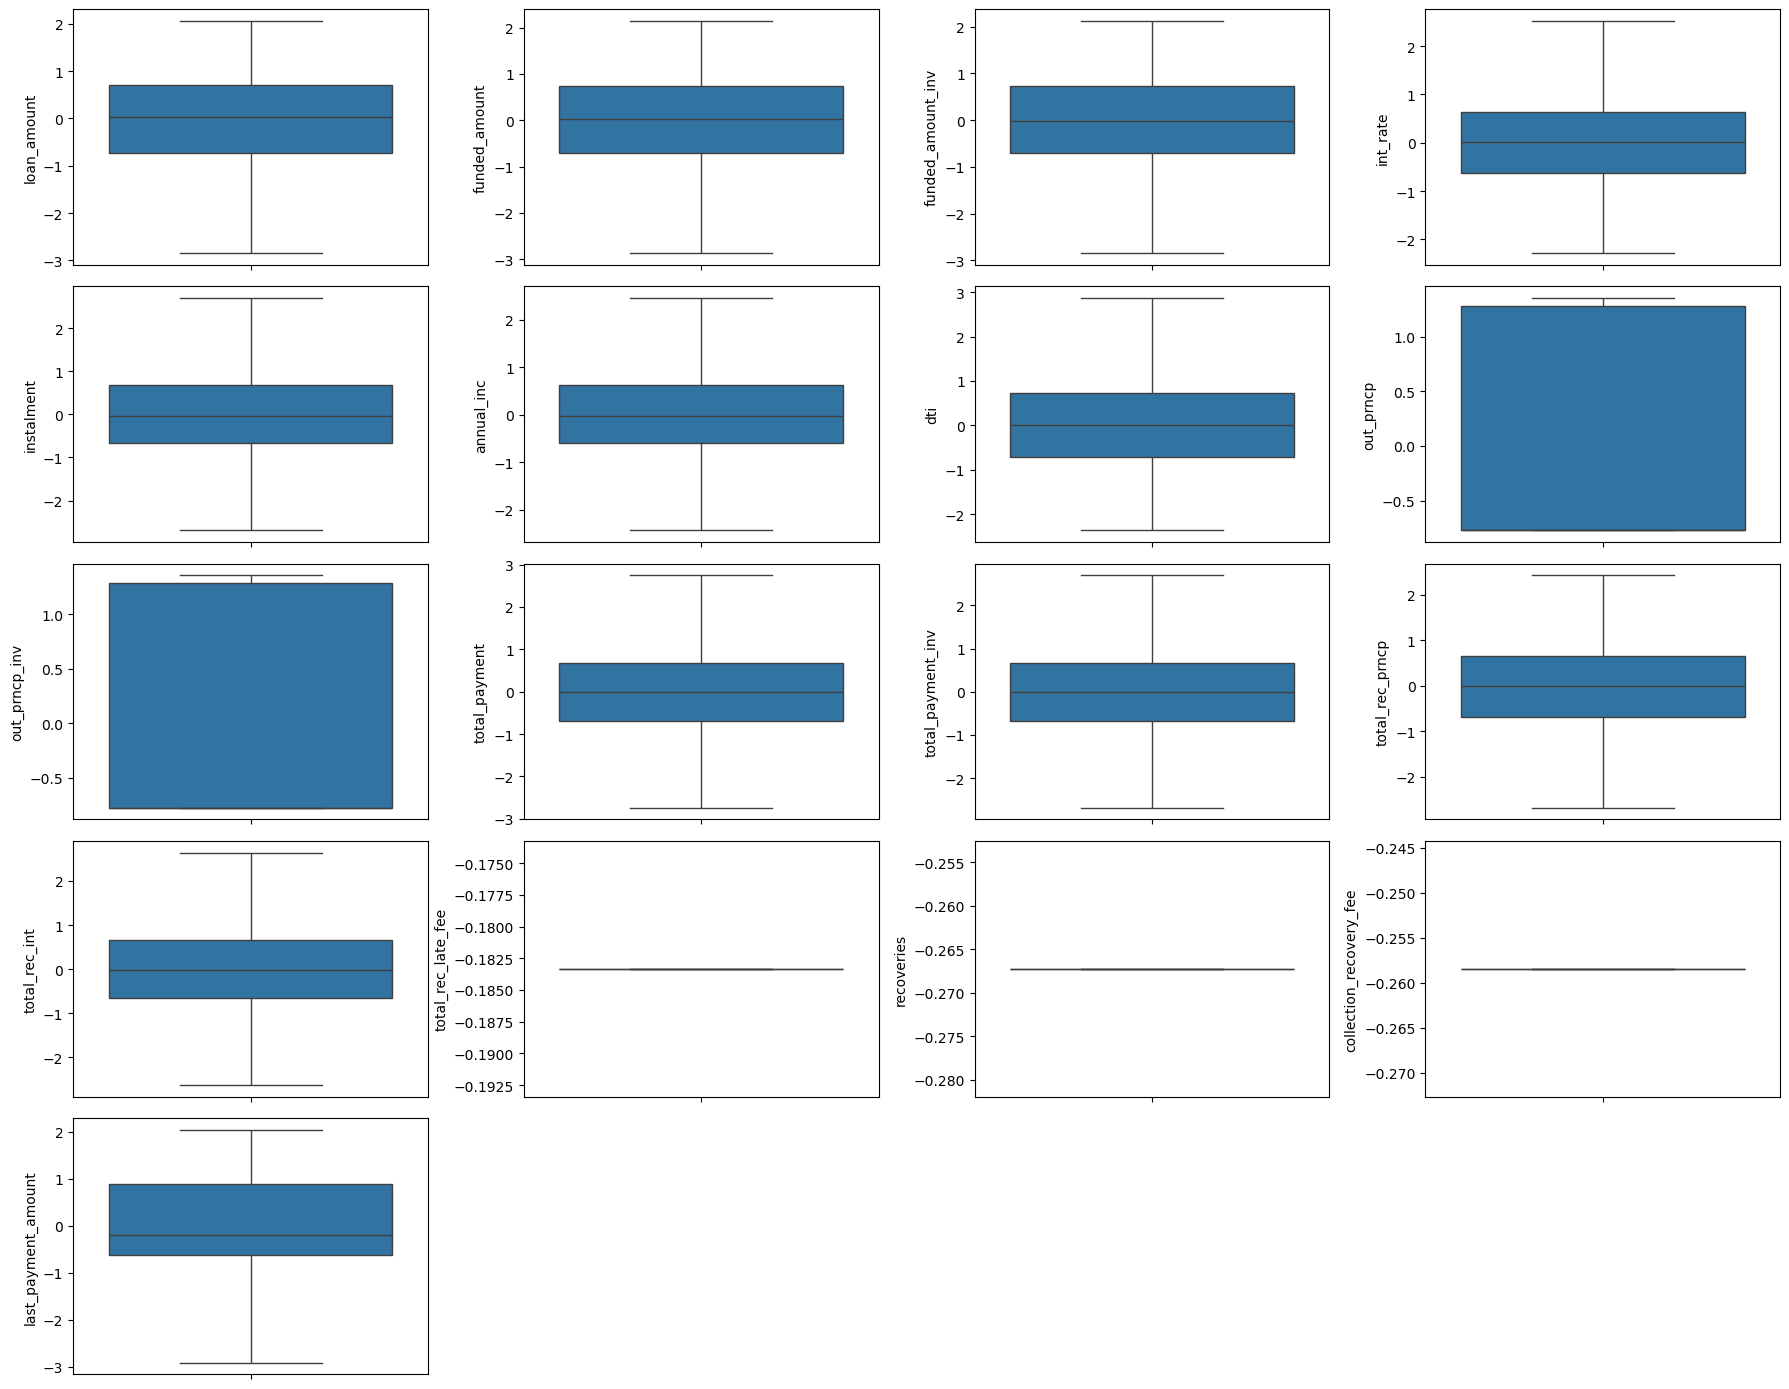

In [43]:
# Re-visualise data to confirm that the outliers have been correctly transformed
plotter = Plotter(df_treated)
plotter.visualise_outliers()

In [45]:
# Three columns will be dropped before computing the correlation matrix. 
# This is because they have a large proportion of identical, low values in the dataset which the box plots confirms.

df_yeojon = df_yeojon.loc[:, ~df_yeojon.columns.isin(['total_rec_late_fee', 'recoveries', 'collection_recovery_fee'])]

### Dropping overly correlated columns

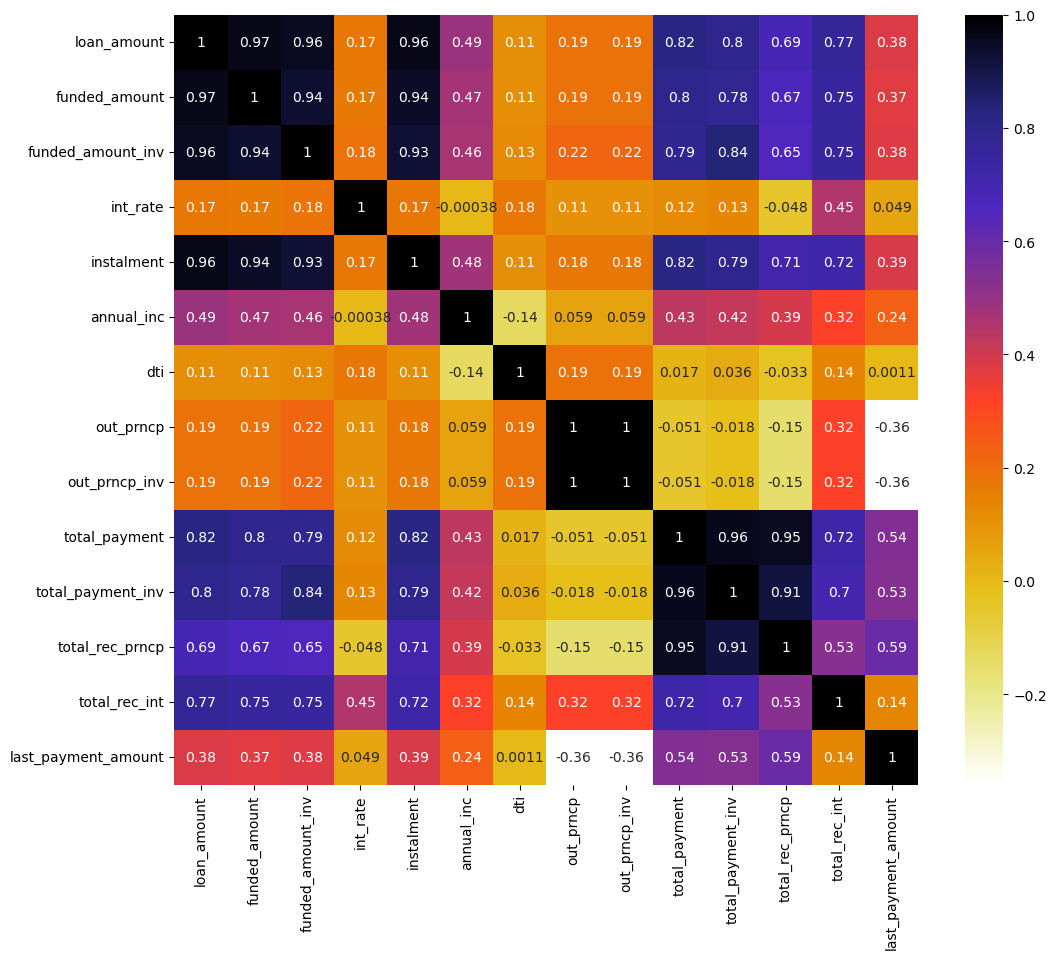

In [46]:
# Compute the correlation matrix for the dataset and visualise it.
import matplotlib.pyplot as plt
import seaborn as sns

# Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_yeojon.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [47]:
# With this function we can select the overly correlated features. It will remove the first feature that is correlated with any other feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # We are interested in absolute coefficients
                colname = corr_matrix.columns[i] # Getting the name of the column
                col_corr.add(colname)
    return col_corr

In [48]:
# identify the columns that ar highly correlated using a correlation threshold of 90%.

correlated_columns = correlation(df_yeojon, 0.9)

In [49]:
# Number of highlyly correlated columns
print(len(correlated_columns))

6


In [50]:
# List of highly correlated columns
print(list(correlated_columns))

['funded_amount_inv', 'total_payment_inv', 'out_prncp_inv', 'funded_amount', 'total_rec_prncp', 'instalment']


In [51]:
# Remove the highly correlated columns from the dataset.
df_yeojon.drop(correlated_columns, axis=1)

,loan_amount,int_rate,annual_inc,dti,out_prncp,total_payment,total_rec_int,last_payment_amount
0,-0.548575,-1.569321,-0.558675,0.518141,1.307059,-1.398768,-1.131511,-0.740159
1,0.182907,-1.736669,-0.398911,1.074506,1.353088,-0.896332,-0.765725,-0.429360
2,0.500897,-1.569321,0.339418,0.192247,-0.771938,0.740767,-0.725645,1.576815
3,0.391750,0.283760,-0.733898,2.334427,-0.771938,0.656713,-0.601109,1.619148
4,0.391750,-2.076673,1.572224,-1.774269,1.363828,-0.769683,-0.784886,-0.358660
...,...,...,...,...,...,...,...,...
54146,-1.124886,-1.094457,2.532917,-0.731396,-0.771938,-0.718485,-0.838665,-1.020888
54147,-1.124886,-0.645051,-2.785353,1.097805,-0.771938,-0.677606,-0.723744,-0.314786
54148,-1.501537,-1.589083,2.847494,-2.222625,-0.771938,-1.130808,-1.300395,-1.263774
54149,-1.124886,-1.589083,2.143179,-2.383909,-0.771938,-0.832843,-1.941825,-4.713384
